In [32]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: c:\Users\KELINE\projet MLearning\MLProject


In [ ]:
#pip install scikit-learn

In [ ]:
#pip install plotly

In [ ]:
#pip install statsmodels

In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option("display.max_columns",None)

import plotly.express as px
import statistics
import scipy.stats as stats
from pandas import Series, DataFrame




from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.metrics import make_scorer
from sklearn import model_selection
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
sb.set_style("whitegrid")


import sklearn.decomposition as sdec
import  sklearn.preprocessing as sprep
import sklearn.discriminant_analysis as sda

In [34]:
df=pd.read_csv('global-data-on-sustainable-energy.csv')

In [35]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [36]:
df.shape

(3649, 21)

In [37]:
df.duplicated().sum()

0

# Exploratory Data Analysis

In [8]:
df.nunique()

Entity                                                               176
Year                                                                  21
Access to electricity (% of population)                             2040
Access to clean fuels for cooking                                    896
Renewable-electricity-generating-capacity-per-capita                2110
Financial flows to developing countries (US $)                      1017
Renewable energy share in the total final energy consumption (%)    2587
Electricity from fossil fuels (TWh)                                 1859
Electricity from nuclear (TWh)                                       547
Electricity from renewables (TWh)                                   1533
Low-carbon electricity (% electricity)                              2647
Primary energy consumption per capita (kWh/person)                  3628
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         1044
Value_co2_emissions_kt_by_country                  

In [38]:
df.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

#### 1. Unidimensionnal analysis

#### 2. Variable transformation

In [39]:
df.columns.tolist()

['Entity',
 'Year',
 'Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita',
 'Density\\n(P/Km2)',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']

In [40]:
# Rename Density 
df.rename(columns={'Density\\n(P/Km2)': 'Density (P/Km2)'}, inplace=True)

In [42]:
# Remove commas and convert to float
df['Density (P/Km2)'] = df['Density (P/Km2)'].str.replace(',', '').astype('float64')

In [43]:
df['Density (P/Km2)'] = df['Density (P/Km2)'].astype('float64')

In [44]:
df['Year'] = df['Year'].astype('object')

In [45]:
df.dtypes

Entity                                                               object
Year                                                                 object
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

#### 3. Missing values rate for each variable

In [46]:
def missing(df):
    print (round((df.isna().sum() * 100/ len(df)),2).sort_values(ascending=False))

print(missing(df))

Renewables (% equivalent primary energy)                            58.56
Financial flows to developing countries (US $)                      57.25
Renewable-electricity-generating-capacity-per-capita                25.51
Value_co2_emissions_kt_by_country                                   11.73
gdp_growth                                                           8.69
gdp_per_capita                                                       7.73
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          5.67
Renewable energy share in the total final energy consumption (%)     5.32
Access to clean fuels for cooking                                    4.63
Electricity from nuclear (TWh)                                       3.45
Low-carbon electricity (% electricity)                               1.15
Electricity from renewables (TWh)                                    0.58
Electricity from fossil fuels (TWh)                                  0.58
Access to electricity (% of population

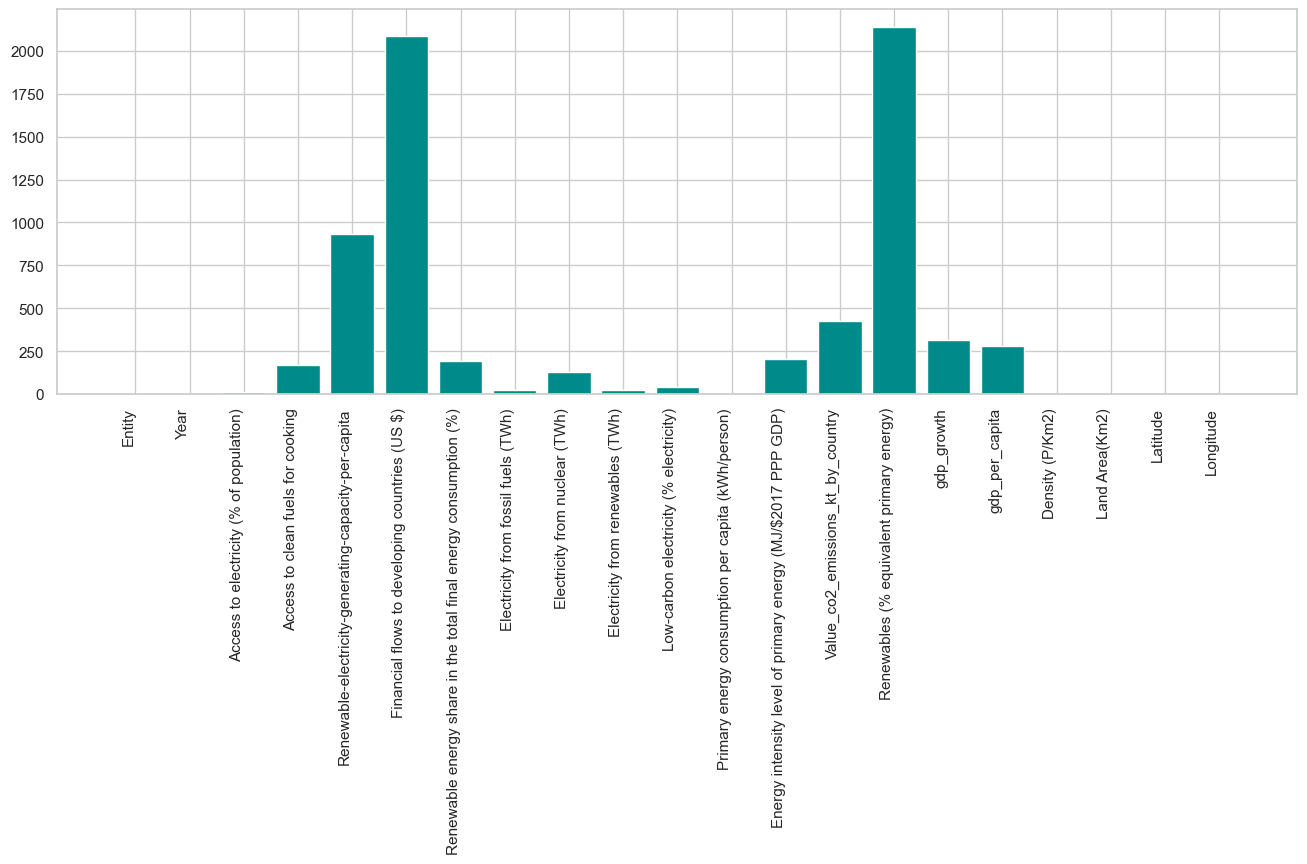

In [47]:
# Calculating the count of missing values in each column
missing_values = df.isnull().sum()
plt.figure(figsize=(16, 5))
plt.bar(x=missing_values.index, height=missing_values.values, color='darkcyan')
plt.xticks(rotation=90, ha="right") 

plt.show()

In [48]:
# Drop columns with a high number of missing values
df.drop(columns=['Financial flows to developing countries (US $)','Renewables (% equivalent primary energy)',
                 'Renewable-electricity-generating-capacity-per-capita'], inplace=True)

In [49]:
df.shape

(3649, 18)

In [50]:
# Sauvegarde du dataframe en fichier .csv
df.to_csv("df_withmissing.csv", index=False)

In [51]:
# Fill remaining missing values with mean value of that column
df.fillna(df.mean(numeric_only=True), inplace = True)

In [52]:
print(missing(df))

Entity                                                              0.0
Year                                                                0.0
Latitude                                                            0.0
Land Area(Km2)                                                      0.0
Density (P/Km2)                                                     0.0
gdp_per_capita                                                      0.0
gdp_growth                                                          0.0
Value_co2_emissions_kt_by_country                                   0.0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.0
Primary energy consumption per capita (kWh/person)                  0.0
Low-carbon electricity (% electricity)                              0.0
Electricity from renewables (TWh)                                   0.0
Electricity from nuclear (TWh)                                      0.0
Electricity from fossil fuels (TWh)                             

#### 3.Unidimensionnal analysis

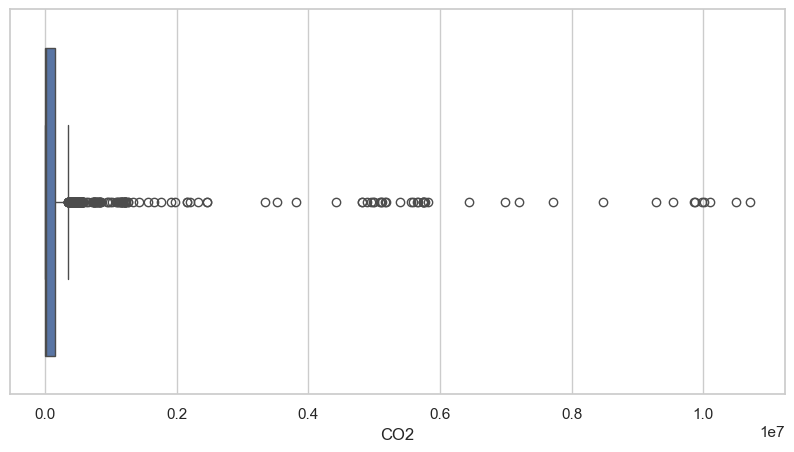

In [53]:

# Boxplot runtime
plt.figure(figsize=(10,5))
plt.xlabel('CO2')
sns.boxplot(x=df['Value_co2_emissions_kt_by_country'])
plt.show()

Application of a logarithmic transformation on CO2 emissions

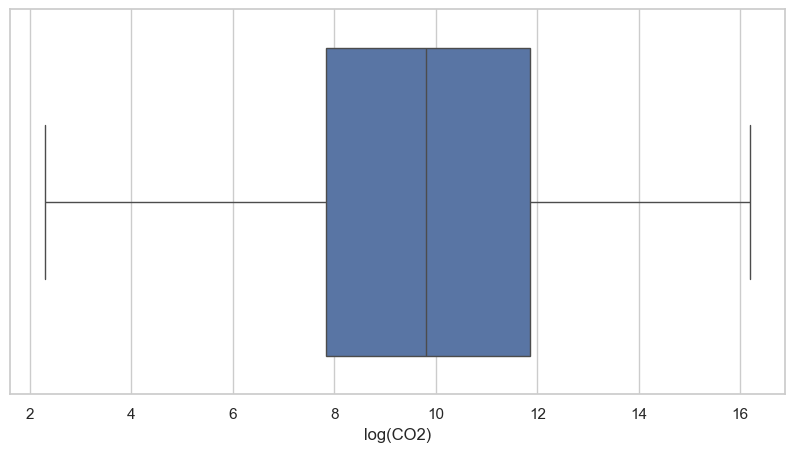

In [54]:
plt.figure(figsize=(10,5))
plt.xlabel('log(CO2)')
sns.boxplot(x=np.log(df['Value_co2_emissions_kt_by_country']))
plt.show()

In [55]:
def plot_distribution(df,k):

    '''
      cette fonction permet de représenter les distributions des variables de df
      maximum 12 à la fois. Il faut faire varier k pour voir l'ensemble des distributions
      de X1new

      pré: df est un dataframe.
           k est un entier
    '''

    #plt.style.use('seaborn')
    fig, axs = plt.subplots(nrows=4,ncols=3, figsize = (15, 15))
    fig.suptitle('Distribution des variables',fontsize = 10)
    i=0
    j=0
    for col in df.columns[k:k+12]:
        axs[i,j].hist(df[col], edgecolor = 'white', align = 'mid', bins = 20)
        axs[i,j].set_xlabel(col)
        j=j+1
        if j==3:
            j=0
            i=i+1
        if i==4:
            break

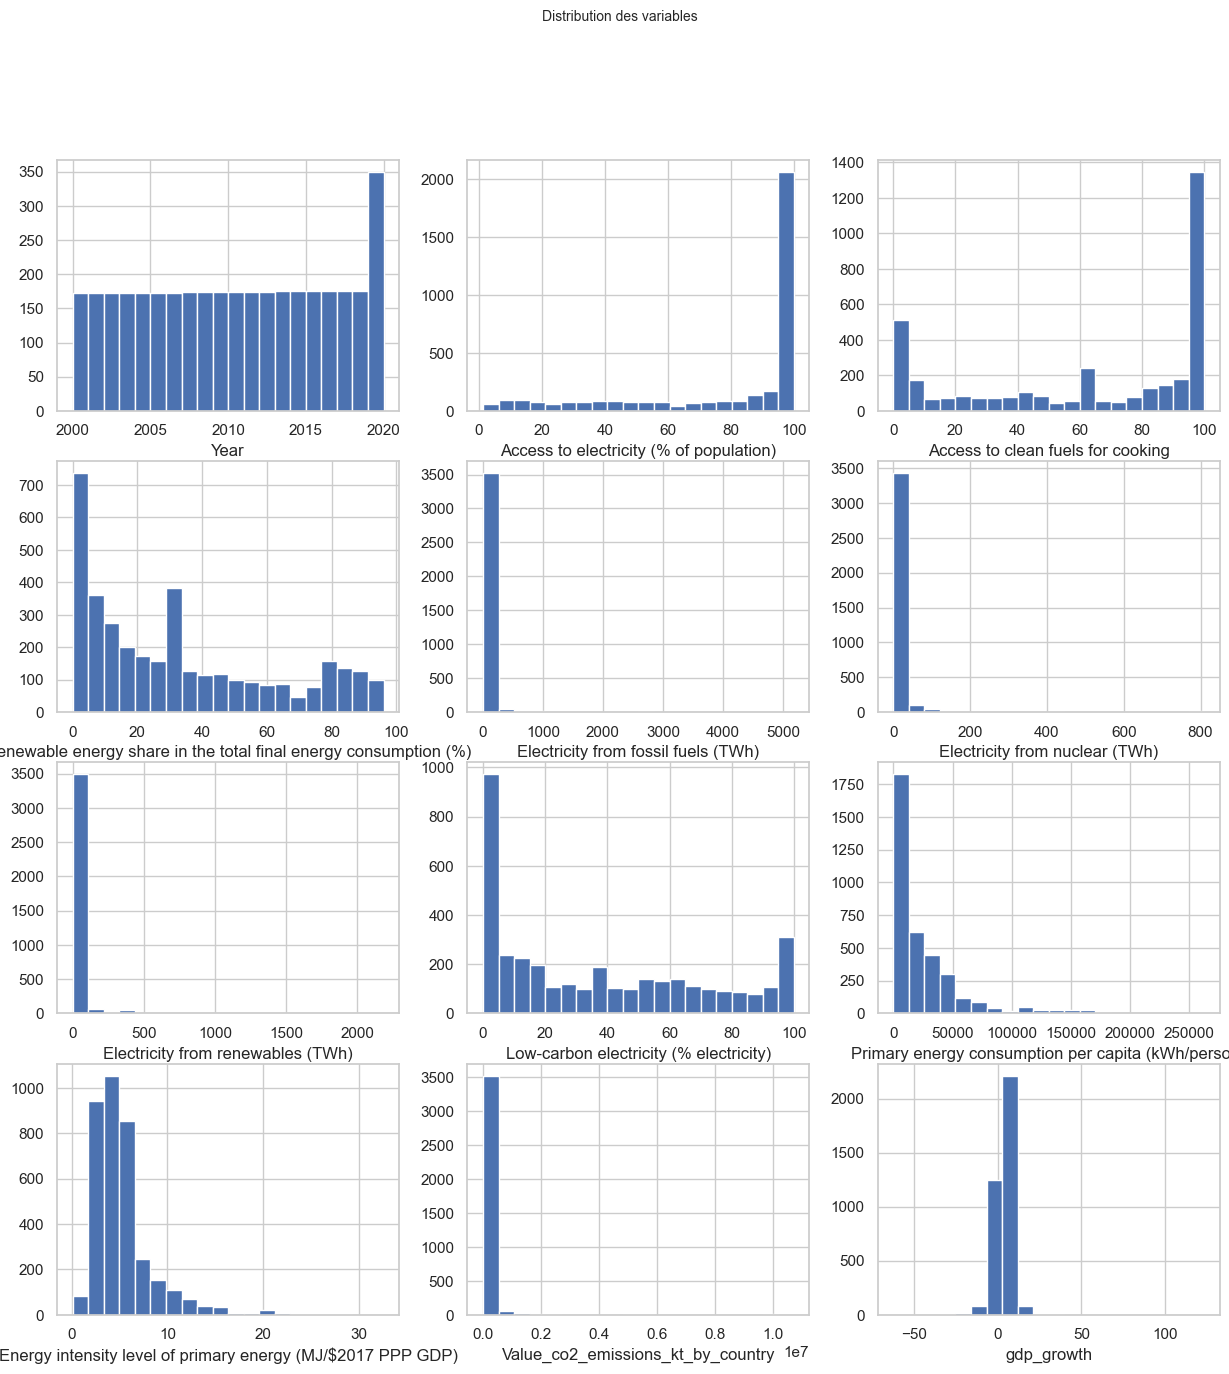

In [56]:
plot_distribution(df,1)  # Prendre differente valeurs de k afin de visualise la distribution des variables

#### 4. CO2 emissions between countries

In [57]:
# Calculate the maximum 'CO2' emissions for each 'Country' category and sort in descending order
max_co2 = df.groupby('Entity')['Value_co2_emissions_kt_by_country'].max().reset_index()
max_co2 = max_co2.sort_values(by='Value_co2_emissions_kt_by_country', ascending=False)

# Select the top 5 'Country' categories with the highest maximum 'CO2' emissions
top_5_high_co2 = max_co2.head(5)

# Create a bar plot using Plotly Express
fig = px.bar(
    top_5_high_co2,  # DataFrame containing the data
    x='Entity',  # x-values: 'Country' categories
    y='Value_co2_emissions_kt_by_country',  # y-values: maximum 'CO2' emissions
    title='Top 5 Countries by Maximum CO2 Emissions',  
    labels={'Country': 'Country', 'CO2': 'CO2 Emissions'},  
    template='plotly_white' 
)

# Set the height of the plot
fig.update_layout(height=650)

# Display the plot
fig.show()

#### 5. Multidimensional analysis

In [58]:
new_df = df.drop(['Year', 'Entity'], axis=1)

In [59]:
new_df.shape

(3649, 16)

In [60]:
new_df.head(2)

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
0,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.0,3.44161,13283.774348,60.0,652230.0,33.93911,67.709953
1,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.0,3.44161,13283.774348,60.0,652230.0,33.93911,67.709953


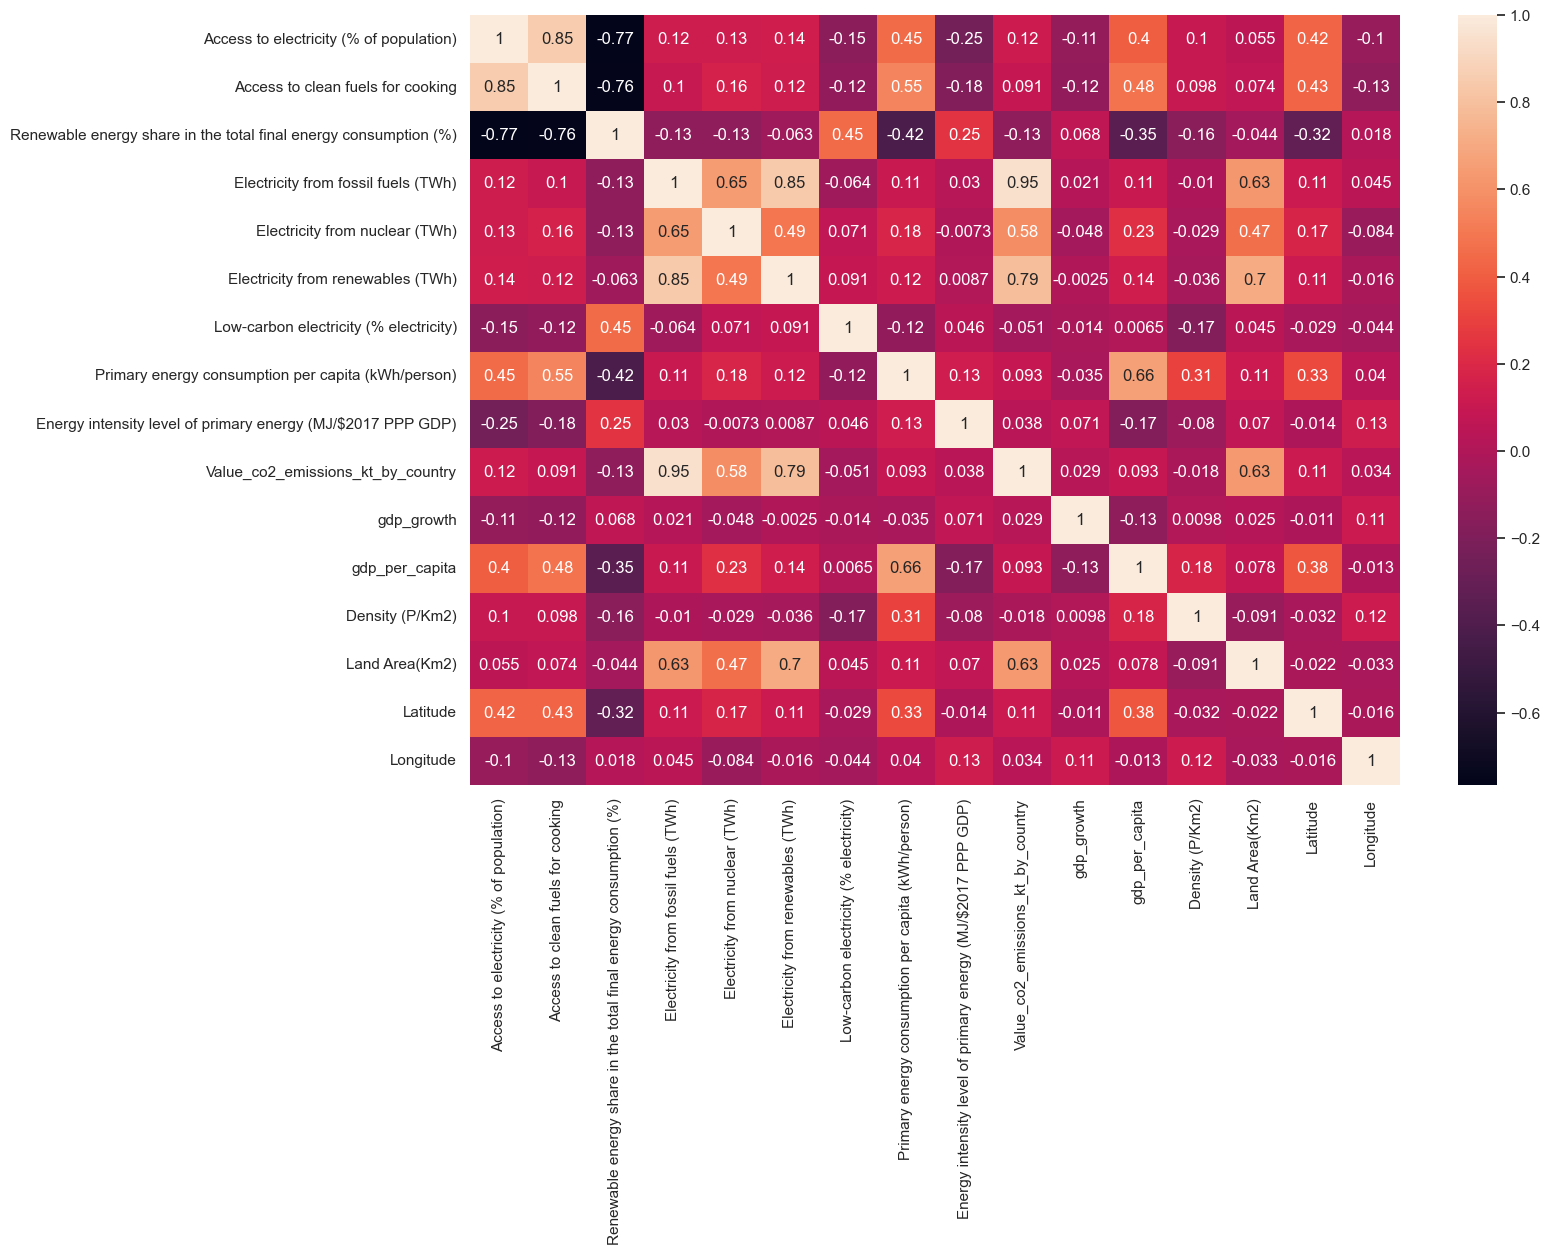

In [61]:
plt.figure(figsize=(15, 10))
correlation_map = new_df.corr()
heatmap = sns.heatmap(correlation_map, annot=True)

plt.show()


#### 6. PCA between quantitative variables

In [32]:
# Data standardisation
from sklearn.preprocessing import StandardScaler
d = df.drop(['Year', 'Entity'], axis=1)  # drop Year and Entity
# Standardize the data
df_normalised = pd.DataFrame(StandardScaler().fit_transform(d), columns=d.columns)

# Display the first few rows of the normalized DataFrame
df_normalised.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
0,-2.557738,-1.496598,0.424678,-0.202319,-0.187525,-0.227228,0.854719,-0.731738,-1.069235,-0.218925,0.000000,9.608959e-17,-0.239395,0.011997,0.649732,0.797336
1,-2.476329,-1.470367,0.445651,-0.202521,-0.187525,-0.225403,1.405501,-0.733627,-1.040080,-0.218967,0.000000,9.608959e-17,-0.239395,0.011997,0.649732,0.797336
2,-2.299862,-1.444137,0.178505,-0.202406,-0.187525,-0.224827,1.300367,-0.734376,-1.139208,-0.218554,0.000000,-6.922478e-01,-0.239395,0.011997,0.649732,0.797336
3,-2.123568,-1.410037,0.138278,-0.201887,-0.187525,-0.224154,0.885906,-0.733826,-1.139208,-0.218292,0.992157,-6.916532e-01,-0.239395,0.011997,0.649732,0.797336
4,-1.947369,-1.373314,0.398892,-0.201829,-0.187525,-0.224827,0.765716,-0.734567,-1.197520,-0.218554,-0.373162,-6.905597e-01,-0.239395,0.011997,0.649732,0.797336


In [21]:
d.shape

(3649, 16)

In [33]:
from sklearn.decomposition import PCA
import numpy as np
import plotly.express as px

# Assuming df_normalised is your normalized DataFrame
pca_text = PCA().fit(df_normalised)

# Visualize the percentage of explained variance vs. the number of principal components
df_exp_var_cumul = np.cumsum(pca_text.explained_variance_ratio_)

fig = px.area(
    x=range(1, df_exp_var_cumul.shape[0] + 1),
    y=df_exp_var_cumul,
    labels={"x": "Components", "y": "Explained Variance"},
    title="Cumulative Explained Variance"
)

fig.show()


#### 7. Analysis of the dependence between year and Value-co2-emissions

In [62]:
import plotly.express as px

# Calculate the maximum 'CO2' emissions for each 'Year'
CO2_By_Year = df.groupby('Year')['Value_co2_emissions_kt_by_country'].max().reset_index()

# line plot
fig_CO2_By_Year = px.line(
    CO2_By_Year,
    x='Year',
    y='Value_co2_emissions_kt_by_country',
    labels={'Year': 'Year', 'Value_co2_emissions_kt_by_country': 'Max CO2 Emissions (kt)'},
    title='Maximum CO2 Emissions by Year',
    height=500,  
    line_shape='linear',  
    line_dash_sequence=['solid'],  
    markers=True,  
    template='plotly_white' 
)

fig_CO2_By_Year.update_layout(
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    title_font=dict(size=18)
)

fig_CO2_By_Year.show()


# Modelisation

In [63]:
df_cleaned = pd.read_csv('df_withmissing.csv')

In [64]:
df_cleaned.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_emissions_kt_by_country                                   float64
gdp_growth                                                          float64
gdp_per_capi

In [65]:
df_cleaned['Year'] = df_cleaned['Year'].astype('object')

In [66]:
df_cleaned.dtypes

Entity                                                               object
Year                                                                 object
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_emissions_kt_by_country                                   float64
gdp_growth                                                          float64
gdp_per_capi

In [67]:
df_cleaned.dropna(inplace=True)

In [68]:
df_cleaned.shape

(2868, 18)

In [69]:
categorical_vars = ["Entity", "Year"]

# instantiate the one hot encoder
one_hot_encoder = OneHotEncoder(sparse=False, drop = "first")

In [70]:
# apply the one hot encoder logic 
encoder_vars_array = one_hot_encoder.fit_transform(df_cleaned[categorical_vars])

# create object for the feature names using the categorical variables
encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)

# create a dataframe to hold the one hot encoded variables
encoder_vars_df = pd.DataFrame(encoder_vars_array, columns = encoder_feature_names)

# concatenate the new dataframe back to the original input variables dataframe
df_cleaned_new = pd.concat([df_cleaned.reset_index(drop=True), encoder_vars_df.reset_index(drop=True)], axis = 1)

# drop the original input 2 and input 3 as it is not needed anymore
df_cleaned_new.drop(categorical_vars, axis = 1, inplace = True)

c:\Users\KELINE\anaconda3\envs\mLearning\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [15]:
df_cleaned_new.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),...,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019
0,98.96687,97.3,8.79,810000.0,0.43,24.96,0.0,0.07,0.279664,9961.640,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98.95306,97.8,8.68,310000.0,0.51,25.94,0.0,0.06,0.230769,10180.350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,98.93401,98.0,8.57,90000.0,0.47,27.54,0.0,0.26,0.935252,10510.461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,98.91208,98.2,8.46,140000.0,0.44,29.14,0.0,0.25,0.850630,10759.022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,98.88961,98.5,8.34,160000.0,0.58,31.36,0.0,0.55,1.723598,11113.723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
df_cleaned_new.columns

Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       ...
       'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019'],
      dtype='object', length=182)

In [72]:
df_cleaned_new.dtypes

Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
                                                                     ...   
Year_2015                                                           float64
Year_2016                                                           float64
Year_2017                                                           float64
Year_2018                                                           float64
Year_2019                                                           float64
Length: 182, dtype: object

### Split the dataset

In [73]:
target = df_cleaned_new['Value_co2_emissions_kt_by_country']

In [74]:
df_cleaned_new.drop(columns=['Value_co2_emissions_kt_by_country'], inplace=True)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(df_cleaned_new, target, test_size=0.2, random_state=2024, shuffle=True)

In [76]:
y_train.shape

(2294,)

### Standardization

In [77]:
# standardisation
scaler = StandardScaler()
scaler.fit(x_train)


df_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)

df_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

df_train_scaled.head()


,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,...,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019
0,0.743794,0.962828,-1.078262,-0.192491,-0.195031,-0.240447,-0.890490,1.831879,-0.636285,-0.594448,...,-0.224424,4.434712,-0.234942,-0.222273,-0.229731,-0.230781,-0.234942,-0.234942,-0.233907,-0.229731
1,0.740502,0.960280,-1.202230,-0.153903,-0.195031,-0.242682,-1.154317,0.785775,3.779645,1.517591,...,-0.224424,-0.225494,4.256368,-0.222273,-0.229731,-0.230781,-0.234942,-0.234942,-0.233907,-0.229731
2,0.743794,0.962828,-1.158457,-0.197814,-0.195031,-0.242589,-1.088360,0.526943,-0.694136,0.223232,...,-0.224424,-0.225494,-0.234942,-0.222273,-0.229731,4.333112,-0.234942,-0.234942,-0.233907,-0.229731
3,-1.928732,-1.579247,1.821448,-0.198598,-0.195031,-0.241751,0.054890,-0.694121,0.082715,0.498560,...,-0.224424,-0.225494,-0.234942,-0.222273,-0.229731,-0.230781,-0.234942,-0.234942,-0.233907,-0.229731
4,-2.043484,-1.556322,1.671751,-0.198408,-0.195031,-0.242682,-1.154317,-0.693885,-0.035741,0.810073,...,-0.224424,-0.225494,-0.234942,-0.222273,-0.229731,-0.230781,-0.234942,-0.234942,-0.233907,-0.229731


In [78]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
import math
from sklearn.metrics import mean_squared_error, confusion_matrix, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from numpy import arange
from sklearn.svm import SVR
import scipy.stats as stats
from sklearn import preprocessing

### Important functions for models comparisons

In [79]:
def fit_predict(X_train,Y_train, X_val, model):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_val)
    return y_pred

In [80]:
def compute_rmse(predict, target):
    return np.sqrt(np.sum(np.square(target - predict))/predict.shape[0])

In [81]:
# Nous travaillons avec le log ytrain
log_ytrain = np.log(y_train)

### Linear Regression

In [82]:
# Regression linéaire sans pénalisation

linear_model = LinearRegression()
kfold = KFold(n_splits=5)
for trn_idx, tst_idx in kfold.split(df_train_scaled, log_ytrain):  
    training_data = df_train_scaled.iloc[trn_idx]
    training_target = log_ytrain.iloc[trn_idx]
    validation_data = df_train_scaled.iloc[tst_idx]
    validation_target = log_ytrain.iloc[tst_idx]
    linear_model.fit(training_data, training_target)
    linear_model.predict(validation_data)  

### Lasso

#### Hyperparameter selection

In [83]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}

lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params, 
    cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
lasso_grid.fit(df_train_scaled, log_ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]},
             scoring='neg_root_mean_squared_error', verbose=1)

#### Build the model

In [84]:
lasso_model = lasso_grid.best_estimator_

### Random Forest

#### Hyperparameter selection

In [85]:
gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,10),
            'n_estimators': (100, 200, 300, 400, 500)
        },
        cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
grid_result = gsc.fit(df_train_scaled, log_ytrain.values.ravel())

Fitting 5 folds for each of 35 candidates, totalling 175 fits


#### Build the model

In [31]:
rfr_model = gsc.best_estimator_

#### MLP

In [ ]:
mlp_model = MLPRegressor(hidden_layer_sizes=(256,128,64,32),activation="relu" ,random_state=1, max_iter=2000)
mlp_model.fit(df_train_scaled, log_ytrain.values.ravel())

In [ ]:
MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32), max_iter=2000,
             random_state=1)

#### Gradient Boosting Regressor

In [ ]:
parameters= {
    "n_estimators": [50,100,200,300,400]
}

gradient_grid = GridSearchCV(estimator=GradientBoostingRegressor(random_state=21), param_grid=parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)

gradient_grid.fit(df_train_scaled, log_ytrain.values.ravel())

In [ ]:
gradient_model = gradient_grid.best_estimator_

#### SVR

In [ ]:
parameters = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100], 
    "gamma": [0.001, 0.01, 0.1, 1, 10, 100]
}

svr_grid = GridSearchCV(SVR(), parameters, cv=5)
svr_grid.fit(df_train_scaled, log_ytrain.values.ravel())

In [ ]:
svr_model = svr_grid.best_estimator_

### Models Comparison

In [ ]:
models = [lasso_model, linear_model, rfr_model, gradient_model, svr_model, mlp_model]
x = ["LASSO", "LINEAR", "RFR", "GRADIENT", "SVR", "MLP"]
#score_reg = []
r2_scores = []
rmse = []

for model in models:
  y_pred = model.predict(df_train_scaled)
  r2_scores.append(r2_score(y_train, np.exp(y_pred)))
  rmse.append(mean_squared_error(y_train, np.exp(y_pred), squared = False)) # square =  False to have root mean square error